<p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold"><br>
Análisis</p><br>

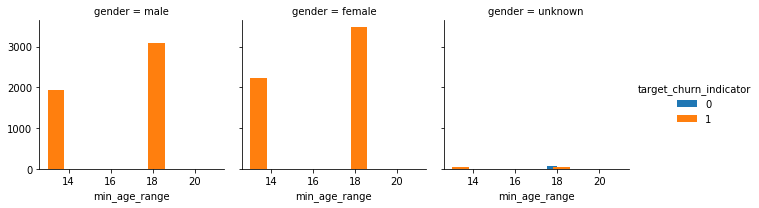

In [91]:
g = sns.FacetGrid(df, col='gender', hue='target_churn_indicator')
g.map(plt.hist, ('min_age_range'))
g.add_legend();

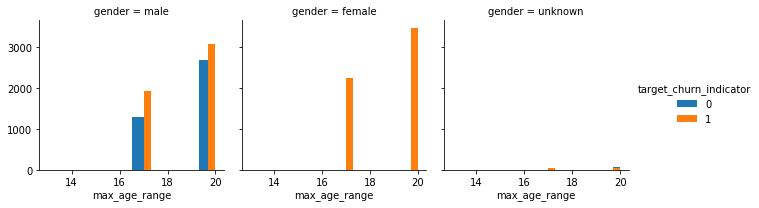

In [92]:
g = sns.FacetGrid(df, col='gender', hue='target_churn_indicator')
g.map(plt.hist, ('max_age_range'))
g.add_legend();